In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd
from collections import Counter
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

# Dataset Imported

In [56]:
anomaly_dt = pd.read_csv('D:/Dataset/Placement_data_full_class.csv')

In [57]:
anomaly_dt.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


# Descriptive analysis

In [58]:
anomaly_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [59]:
anomaly_dt.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# Data visualisation

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

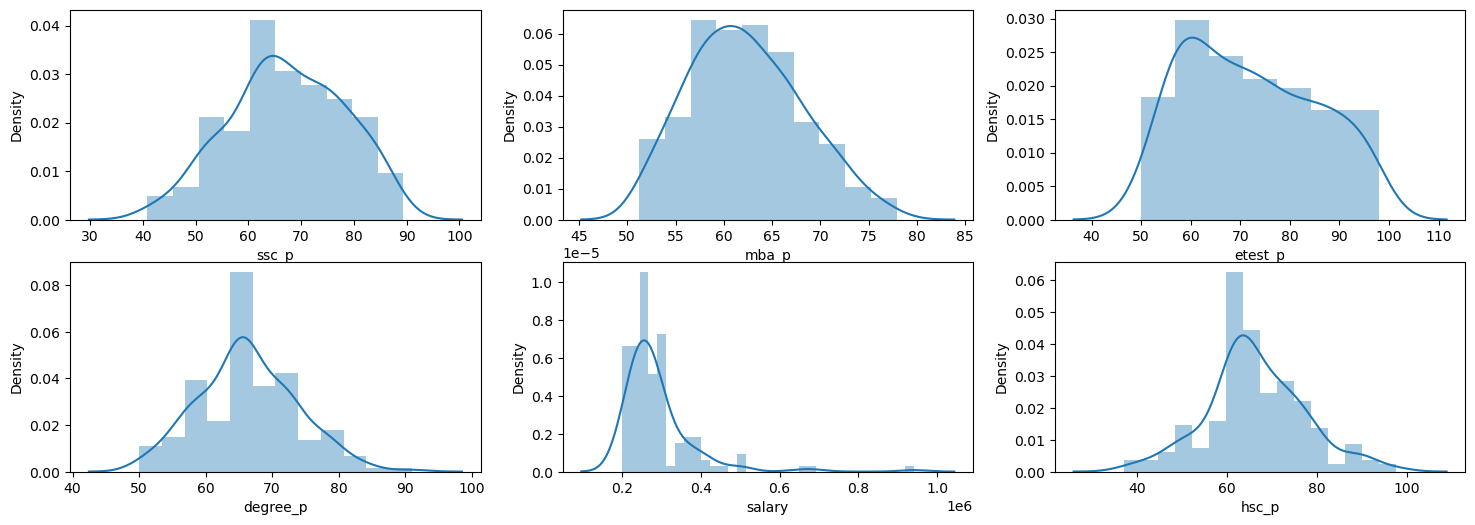

In [60]:
plt.figure(figsize=(18,6))
plt.subplot(2,3,1)
sns.distplot(anomaly_dt['ssc_p'])
plt.subplot(2,3,2)
sns.distplot(anomaly_dt['mba_p'])
plt.subplot(2,3,3)
sns.distplot(anomaly_dt['etest_p'])
plt.subplot(2,3,4)
sns.distplot(anomaly_dt['degree_p'])
plt.subplot(2,3,5)
sns.distplot(anomaly_dt['salary'])
plt.subplot(2,3,6)
sns.distplot(anomaly_dt['hsc_p'])
plt.show()

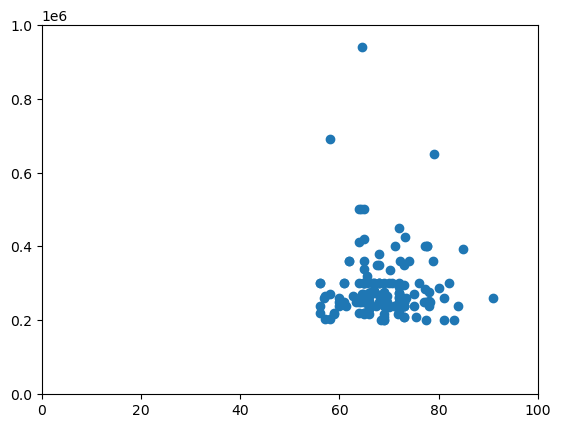

In [44]:
import matplotlib.pyplot as plt
plt.scatter(anomaly_dt['degree_p'],anomaly_dt['salary'])
plt.xlim(0,100)
plt.ylim(0,1000000)
plt.show()

In [45]:
Best_degree =anomaly_dt['degree_p'].mean() + 3*anomaly_dt['degree_p'].std()
Low_degree=anomaly_dt['degree_p'].mean() - 3*anomaly_dt['degree_p'].std()
Best_Salary=anomaly_dt['salary'].mean() + 3*anomaly_dt['salary'].std()
Low_Salary=anomaly_dt['salary'].mean() - 3*anomaly_dt['salary'].std()

print("Ultimate Degree:",Best_degree)
print("Lowest Degree: ",Low_degree)
print("Ultimate Salary:",Best_Salary)
print("Lowest Salary:",Low_Salary)

Ultimate Degree: 88.44641590852996
Lowest Degree:  44.29395618449332
Ultimate Salary: 569027.7626641716
Lowest Salary: 8283.048146639136


# Spotting outliers

In [46]:
Outlier_values=anomaly_dt[(anomaly_dt['salary'] > Best_Salary) | (anomaly_dt['salary'] < Low_Salary)].append(anomaly_dt[(anomaly_dt['degree_p'] > Best_degree) | (anomaly_dt['degree_p'] < Low_degree)])
Outlier_values

C:\Users\User\AppData\Local\Temp\ipykernel_8904\2442047898.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Outlier_values=anomaly_dt[(anomaly_dt['salary'] > Best_Salary) | (anomaly_dt['salary'] < Low_Salary)].append(anomaly_dt[(anomaly_dt['degree_p'] > Best_degree) | (anomaly_dt['degree_p'] < Low_degree)])


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,M,60.80,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
150,151,M,71.00,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
177,178,F,73.00,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
197,198,F,83.96,Others,53.00,Others,Science,91.0,Sci&Tech,No,59.32,Mkt&HR,69.71,Placed,260000.0


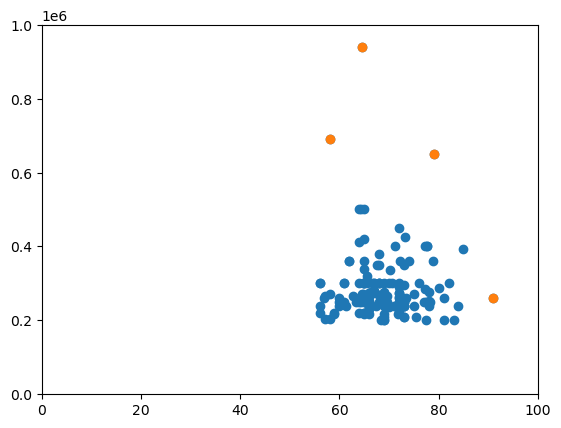

In [47]:
plt.scatter(anomaly_dt['degree_p'],anomaly_dt['salary'])
plt.scatter(Outlier_values['degree_p'],Outlier_values['salary'])
plt.xlim(0,100)
plt.ylim(0,1000000)
plt.show()

In [48]:
anomaly_dt_c=anomaly_dt.copy()
anomaly_dt_c['degree_p'][anomaly_dt_c['degree_p']>Best_degree]=Best_degree
anomaly_dt_c['degree_p'][anomaly_dt_c['degree_p']<Low_degree]=Low_degree

anomaly_dt_c['salary'][anomaly_dt_c['salary']>Best_Salary]=Best_Salary
anomaly_dt_c['salary'][anomaly_dt_c['salary']<Low_Salary]=Low_Salary

C:\Users\User\AppData\Local\Temp\ipykernel_8904\3657067202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_dt_c['degree_p'][anomaly_dt_c['degree_p']>Best_degree]=Best_degree
C:\Users\User\AppData\Local\Temp\ipykernel_8904\3657067202.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_dt_c['degree_p'][anomaly_dt_c['degree_p']<Low_degree]=Low_degree
C:\Users\User\AppData\Local\Temp\ipykernel_8904\3657067202.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

# Removing outliers

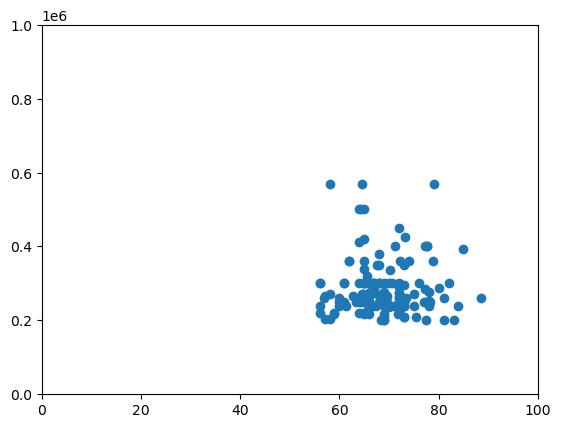

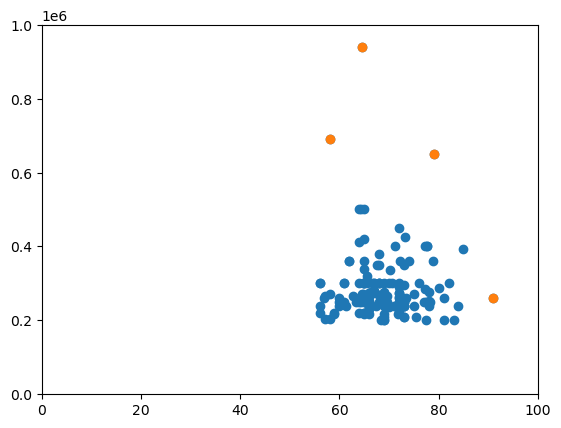

In [21]:
plt.scatter(anomaly_dt_c['degree_p'],anomaly_dt_c['salary'])
plt.xlim(0,100)
plt.ylim(0,1000000)
plt.show()
plt.scatter(anomaly_dt['degree_p'],anomaly_dt['salary'])
plt.scatter(Outlier_values['degree_p'],Outlier_values['salary'])
plt.xlim(0,100)
plt.ylim(0,1000000)
plt.show()

# DBScan Clustering

In [49]:

dbs_dt = pd.read_csv('D:/Dataset/Placement_data_full_class.csv')
dbs_dt=dbs_dt.dropna()[['degree_p','salary']]
dbs_dt.index=[i for i in range(0,148)]

St_scl = StandardScaler().fit(dbs_dt)
dbs_tf = pd.DataFrame(St_scl.transform(dbs_dt))
print(dbs_tf)

            0         1
0   -1.653401 -0.200292
1    1.345354 -0.951839
2   -0.729760 -0.415019
3    0.701884  1.463849
4   -0.421879 -0.393547
..        ...       ...
143 -0.575820 -0.780057
144  1.363827  1.195439
145  0.501762 -0.146610
146  0.655702  0.068118
147 -1.653401 -0.908893

[148 rows x 2 columns]


In [50]:
dbs_tf.describe()

,0,1
count,1.480000e+02,1.480000e+02
mean,6.466299e-16,2.482999e-16
std,1.003396e+00,1.003396e+00
min,-1.961281e+00,-9.518389e-01
25%,-5.758195e-01,-5.223834e-01
50%,-1.139989e-01,-2.539736e-01
75%,5.668015e-01,1.218000e-01
max,3.426625e+00,6.993089e+00


In [51]:
dbsc_clus = DBSCAN(eps = 1.3, min_samples = 25).fit(dbs_tf)
dbsc_labels = dbsc_clus.labels_
print(Counter(dbsc_labels))

Counter({0: 144, -1: 4})


In [54]:
outliers_dbs=dbs_tf[dbsc_labels==-1]
outliers_dbs


,0,1
83,-0.637396,6.993089
108,-1.653401,4.308992
124,1.579343,3.879536
135,3.426625,-0.307656


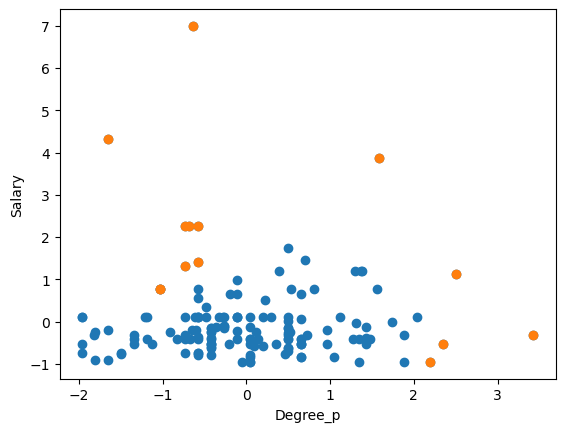

In [25]:
plt.scatter(df[0],df[1])
plt.scatter(outliers[0],outliers[1])
plt.xlabel("Degree_dbs)
plt.ylabel("Salary_dbs")
plt.show()

# InterquatileRange (IQR)

In [31]:
import numpy as np
import pandas as pd
anomal_dt2 = pd.read_csv('D:/Dataset/Placement_data_full_class.csv')

anomal_dt2=anomal_dt2.dropna()[['degree_p','salary']]

anomal_dt2.index=[i for i in range(0,148)]

stscaler = StandardScaler().fit(anomal_dt2)
anomal_dt3 = pd.DataFrame(stscaler.transform(anomal_dt2))

In [33]:
anomal_dt3

,0,1
0,-1.653401,-0.200292
1,1.345354,-0.951839
2,-0.729760,-0.415019
3,0.701884,1.463849
4,-0.421879,-0.393547
...,...,...
143,-0.575820,-0.780057
144,1.363827,1.195439
145,0.501762,-0.146610
146,0.655702,0.068118


In [34]:

qt1, qt3= np.percentile(anomal_dt3[1],[25,75])
iqrst=qt3-qt1

lower_bnd = qt1 -(2.5 * iqrst) 
upper_bnd = qt3 +(2.5 * iqrst)

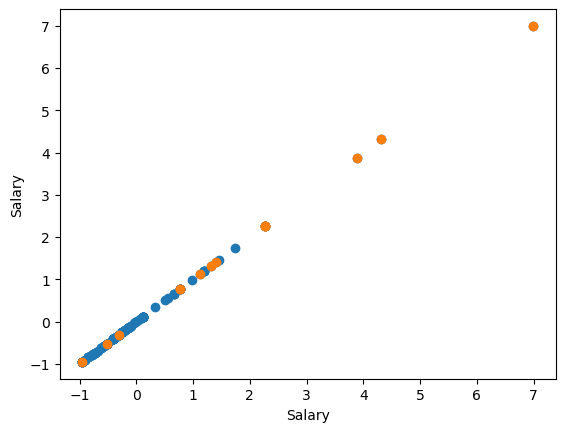

In [37]:
plt.scatter(anomal_dt3[1],anomal_dt3[1])
plt.scatter(outliers[1],outliers[1])
plt.xlabel("Salary")
plt.ylabel("Salary")
plt.show()